@author wcyat

# Airplane Competition

https://www.kaggle.com/competitions/10botics-x-hkage-competition-1/overview

In this competition, your goal is to predict airplane ticket prices using the given training data. Please use your real name as the Team Name, as this will be part of the course grade. You will also need to submit your Notebook at the Google Classroom course page. Please put your name in the notebook in a comment or markdown. The data column information is as follows:

- [MktCoupons] - Numbers of market coupons for that flight
- [Quarter] - Season when the ticket was purchased
- [Origin] - Origin Airport Name
- [OriginWac] - Origin Airport Area Code
- [Dest] - Origin Airport Name
- [DestWac] - Origin Airport Area Code
- [Miles] - Flight Distance
- [ContiguousUSA] - 2: Lower 48 States / 1: Alaska / Hawaii / etc
- [NumTicketsOrdered] - Number of tickets purchased in the transaction
- [AirlineCompany] - Flight Airline

- [PricePerTicket] - Price per Ticket purchased (Target Column)

In [131]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [132]:
df_train = pd.read_csv('data/train.csv', index_col=0)
df_test = pd.read_csv('data/test.csv', index_col=0)

In [133]:
df_train.head()

,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
5,1,1,LAX,91,ORD,41,1744.0,2,1.0,AA,221.41
1328,1,1,MCO,33,ORD,41,1005.0,2,1.0,AA,159.64
5376,1,1,ORD,41,BOS,13,867.0,2,2.0,AA,184.62
5378,1,1,ORD,41,BOS,13,867.0,2,1.0,AA,198.60
5382,1,1,ORD,41,BOS,13,867.0,2,1.0,AA,255.89


In [134]:
# df_train['PricePerTicket'] = df_train['PricePerTicket'].clip(
#    lower=df_train['PricePerTicket'].quantile(0.05), upper=df_train['PricePerTicket'].quantile(0.95))


In [135]:
features = ['MktCoupons', 'Quarter', 'Origin', 'Dest', 'Miles', 'ContiguousUSA', 'NumTicketsOrdered', 'AirlineCompany']

Clustering / linear regression (one-hard encoding)

In [136]:
X = df_train[features]
Y = df_train['PricePerTicket']

In [137]:
X['Route'] = X['Origin'] + '-' + X['Dest']
X.drop(['Origin', 'Dest'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


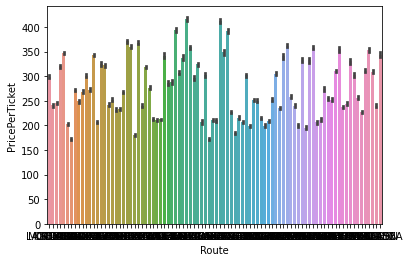

In [138]:
sns.barplot(X['Route'], Y)

In [139]:
# sns.boxplot(X)

In [140]:
encoder = OneHotEncoder(handle_unknown='ignore')
cat_features = ['Route', 'MktCoupons', 'ContiguousUSA', 'AirlineCompany']

In [141]:
X = pd.get_dummies(X, columns=cat_features)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)           

In [143]:
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)


In [144]:
"""input = keras.layers.Input(X.shape[1])

x = keras.layers.Dense(64, activation='selu')(input)

for i in range(0, 8):
    x = keras.layers.Dense(8, activation='selu')(x)

output = keras.layers.Dense(1)(x)"""

"input = keras.layers.Input(X.shape[1])\n\nx = keras.layers.Dense(64, activation='selu')(input)\n\nfor i in range(0, 8):\n    x = keras.layers.Dense(8, activation='selu')(x)\n\noutput = keras.layers.Dense(1)(x)"

In [145]:
#model4 = keras.Model(input, output)

In [146]:
#model4.summary()

In [147]:
#model4.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [148]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
#history = model4.fit(X, Y, epochs=1000, batch_size=4096, callbacks=[callback])
#plt.plot(history.history['loss'])

In [149]:
#predict = model4.predict(x_test)
#np.sqrt(mean_squared_error(y_test, predict))

In [150]:
#plt.scatter(y_test, predict)
#plt.show()

In [151]:
#X.nunique()

In [152]:
def get_score(n_estimators: int):
    """'Return the average MAE over 3 CV folds of random forest model.

    Keyword argument:
    n_estimators -- the number of trees in the forest'"""
    
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', XGBRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, Y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()
    # Replace this body with your own code

In [153]:
# results = {i: get_score(i) for i in  np.array(range(1, 9)) * 50} # Your code here
# min(results, key=results.get)"""

In [154]:
from sklearn.model_selection import cross_val_score
cross_val_score(XGBRegressor(n_estimators=200, random_state=0, n_jobs=8, learning_rate=0.1,
                 eval_metric='rmse', tree_method='gpu_hist'), X, Y, cv=3, scoring='neg_mean_squared_error')


[12:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-18127.65584723, -18209.78135853, -18833.90537505])

In [155]:
model = XGBRegressor(random_state=17, n_estimators=1000,
                     n_jobs=8, learning_rate=0.05, eval_metric='rmse', tree_method='gpu_hist')
model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[
    (x_test, y_test)])


[12:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:305.235
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:293.418
[2]	validation_0-rmse:282.33
[3]	validation_0-rmse:271.935
[4]	validation_0-rmse:262.2
[5]	validation_0-rmse:253.083
[6]	validation_0-rmse:244.558
[7]	validation_0-rmse:236.594
[8]	validation_0-rmse:229.147
[9]	validation_0-rmse:222.209
[10]	validation_0-rmse:215.744
[11]	validation_0-rmse:209.726
[12]	validation_0-rmse:204.142
[13]	validation_0-rmse:198.924
[14]	validation_0-rmse:194.114
[15]	validation_0-rmse:189.633
[16]	validation_0-rmse:185.51
[17]	validation_0-rmse:181.687
[18]	validation_0-rmse:178.155
[19]	validation_0-rmse:174.896
[20]	validation_0-rmse:171.801
[21]	validation_0-rmse:169.035
[22]	validation_0-rmse:166.502
[23]	validation_0-rmse:164.144
[24]	validation_0-rmse:161.991
[25]	validation_0-rmse:160.012
[26]	validation_0

XGBRegressor(eval_metric='rmse', learning_rate=0.05, n_estimators=1000,
             n_jobs=8, random_state=17, tree_method='gpu_hist')

In [165]:
predict = model.predict(x_test)
predict

array([250.77347, 342.9926 , 210.48273, ..., 277.62177, 307.26038,
       419.69342], dtype=float32)

In [166]:
np.sqrt(mean_squared_error(y_test, predict))

134.15769883158342

In [158]:
mean_absolute_error(y_test, predict)

95.6539974239378

In [159]:
model.fit(X, Y)

[12:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse', learning_rate=0.05, n_estimators=1000,
             n_jobs=8, random_state=17, tree_method='gpu_hist')

In [160]:
df_test['Route'] = df_test['Origin'] + '-' + df_test['Dest']
df_test.drop(['Origin', 'Dest'], axis=1, inplace=True)
df_test = pd.get_dummies(df_test, columns=cat_features)

In [161]:
df_test.drop([i for i in df_test.columns if i not in X.columns], axis=1, inplace=True)
df_test.columns = df_test.columns.append([i for i in X.columns if i not in df_test.columns])

In [162]:
predict_kaggle = model.predict(df_test)

In [163]:
df_submit = pd.DataFrame(predict_kaggle, index=df_test.index, columns=['PricePerTicket'])
df_submit.index.name = "id"

In [164]:
df_submit.to_csv("submission.csv")